In [1]:
import sklearn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima_model import ARIMA
from pandas import datetime
from dateutil.parser import parse

/tmp/ipykernel_12525/953808513.py:7: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [8]:
df = pd.read_csv("data.csv")
df.head(10)

,timestamp,mq7,mq135,temperature,humidity
0,1640555763,130.0,62.0,24.2,65.0
1,1640555778,129.0,63.0,24.3,65.0
2,1640555791,129.0,62.0,24.3,65.0
3,1640555807,129.0,63.0,24.3,65.0
4,1640555823,129.0,64.0,24.3,65.0
5,1640555837,128.0,63.0,24.3,65.0
6,1640555852,130.0,63.0,24.3,65.0
7,1640555868,131.0,64.0,24.3,65.0
8,1640555896,129.0,64.0,24.3,65.0
9,1640555912,131.0,64.0,24.3,65.0


In [9]:
df["timestamp"] = pd.to_datetime(df['timestamp'], unit='s')
df["timestamp"] = df["timestamp"].dt.tz_localize('UTC')
df = df.rename(columns={'timestamp': 'index'})
df['date'] = df['index'].dt.date
df

,index,mq7,mq135,temperature,humidity,date
0,2021-12-26 21:56:03+00:00,130.0,62.0,24.2,65.0,2021-12-26
1,2021-12-26 21:56:18+00:00,129.0,63.0,24.3,65.0,2021-12-26
2,2021-12-26 21:56:31+00:00,129.0,62.0,24.3,65.0,2021-12-26
3,2021-12-26 21:56:47+00:00,129.0,63.0,24.3,65.0,2021-12-26
4,2021-12-26 21:57:03+00:00,129.0,64.0,24.3,65.0,2021-12-26
...,...,...,...,...,...,...
66,2021-12-27 13:05:54+00:00,68.0,32.0,29.7,36.0,2021-12-27
67,2021-12-27 13:16:25+00:00,67.0,32.0,28.7,37.0,2021-12-27
68,2021-12-27 13:21:43+00:00,66.0,32.0,28.7,36.0,2021-12-27
69,2021-12-27 13:37:11+00:00,66.0,33.0,28.4,36.0,2021-12-27


In [3]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='', dpi=100):
    plt.figure(figsize=(15,4), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

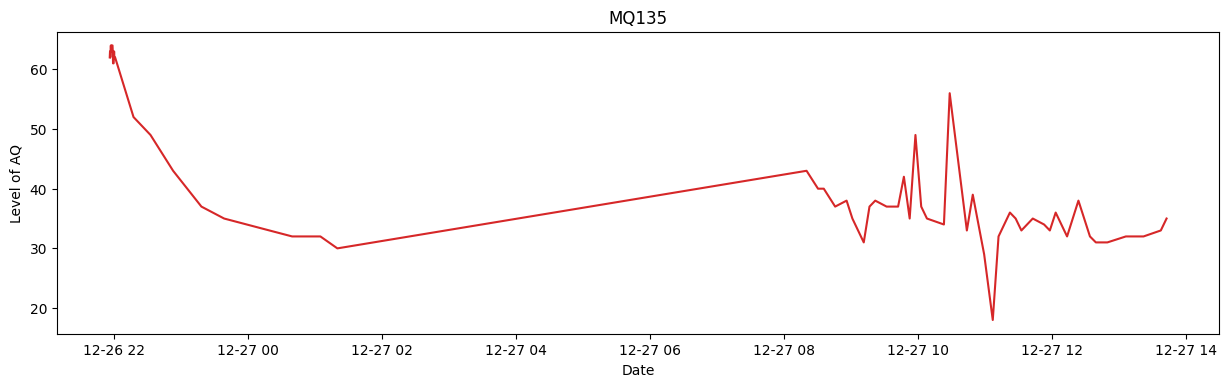

In [11]:
plot_df(df, df["index"], df["mq135"], "MQ135", ylabel="Level of AQ")

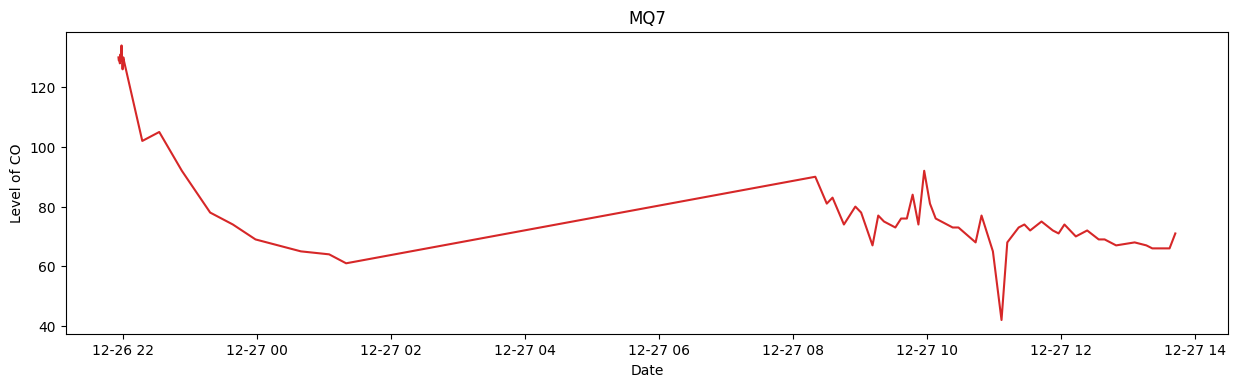

In [13]:
plot_df(df, df["index"], df["mq7"], "MQ7", ylabel="Level of CO")

In [15]:
x = df['index'].values
y1 = df['mq135'].values
y2 = df['mq7'].values

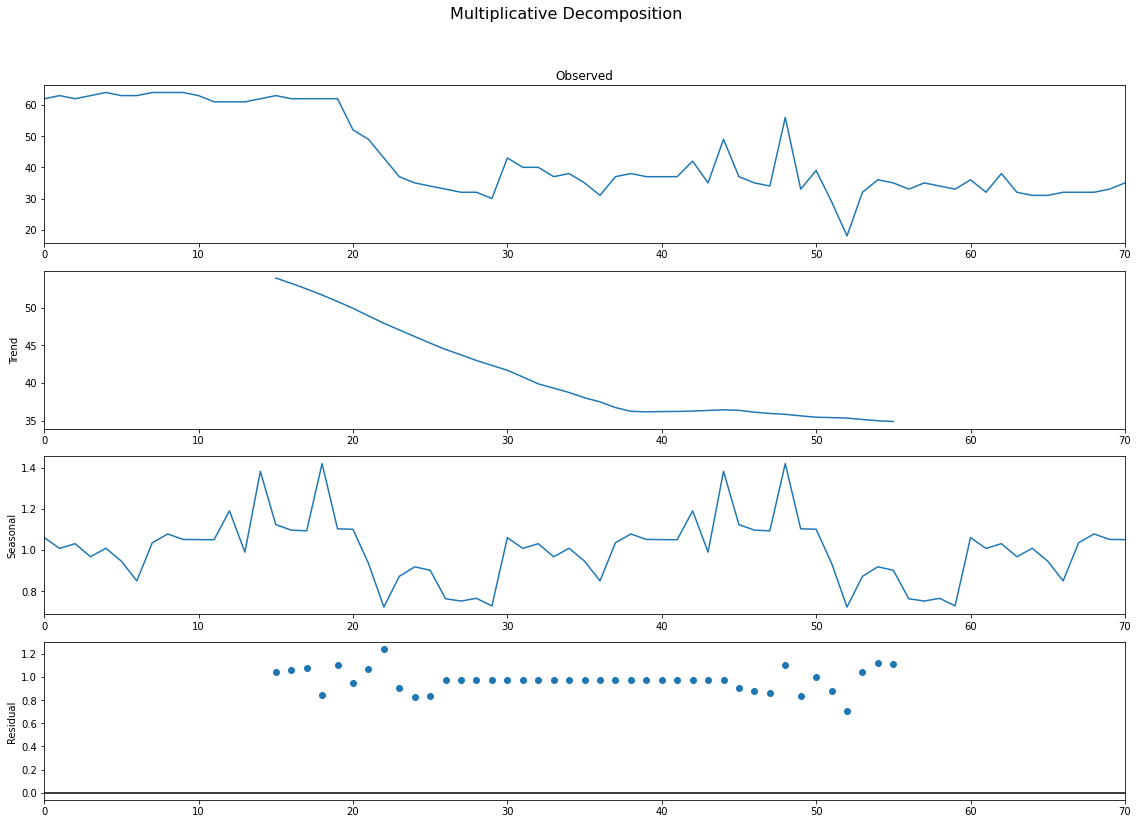

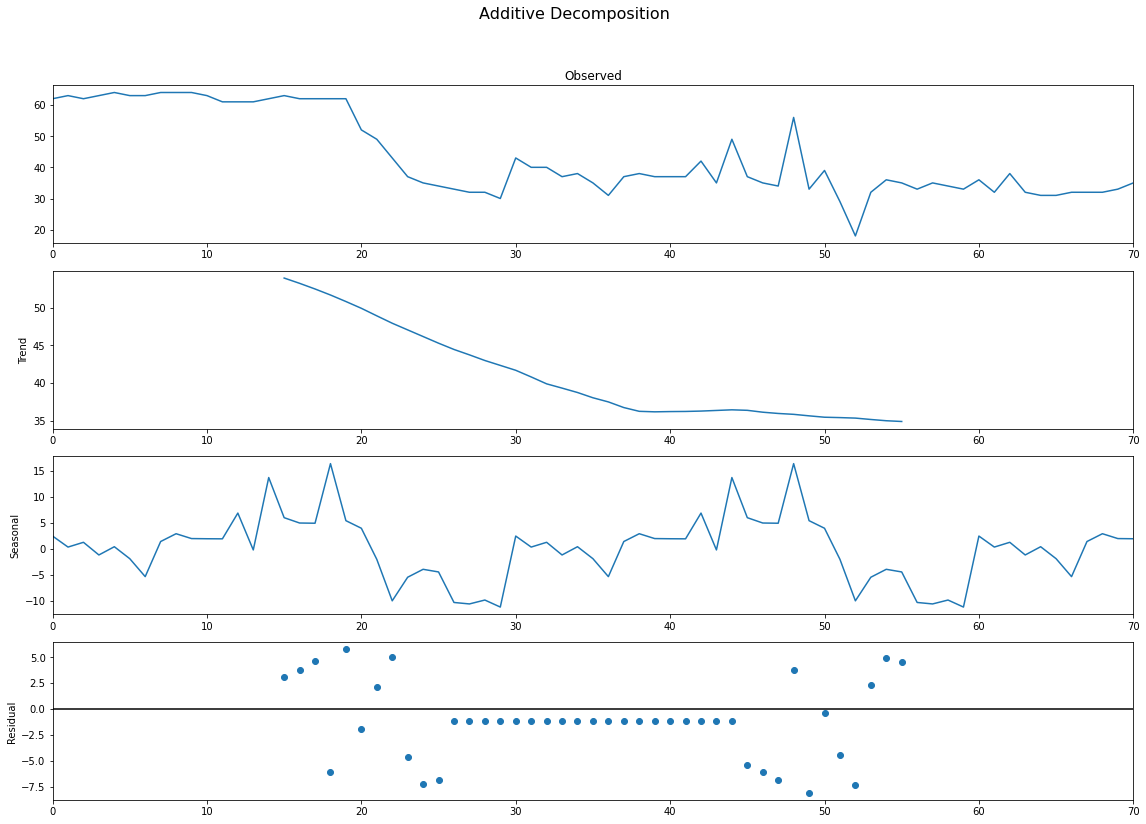

In [16]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(y1, model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(y1, model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

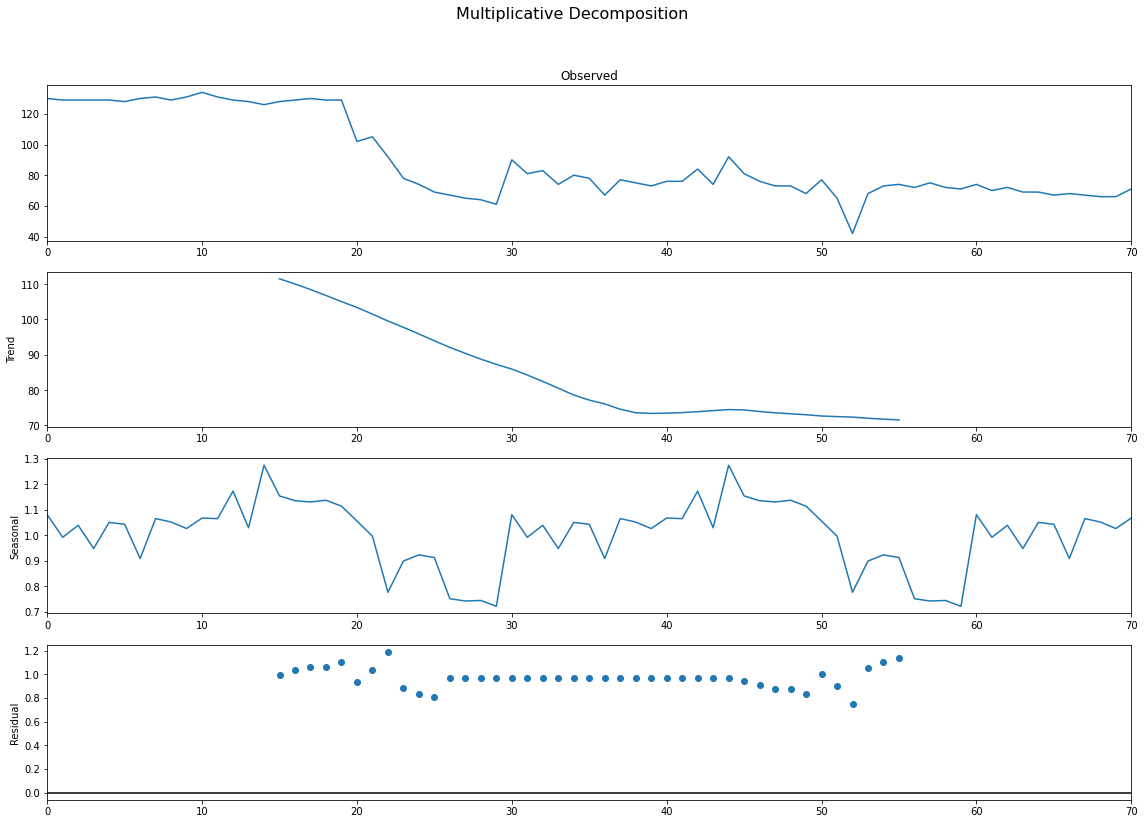

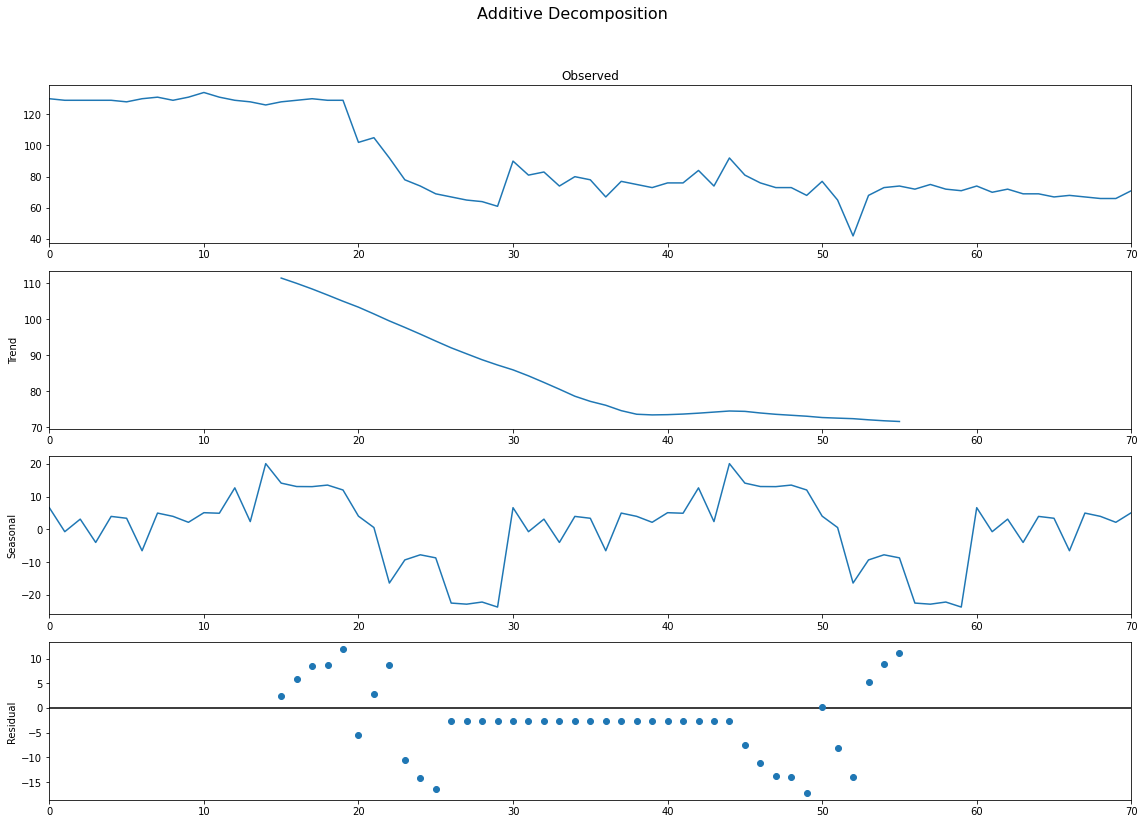

In [17]:
# Multiplicative Decomposition 
multiplicative_decomposition = seasonal_decompose(y2, model='multiplicative', period=30)

# Additive Decomposition
additive_decomposition = seasonal_decompose(y2, model='additive', period=30)

# Plot
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot().suptitle('Multiplicative Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

additive_decomposition.plot().suptitle('Additive Decomposition', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])

plt.show()

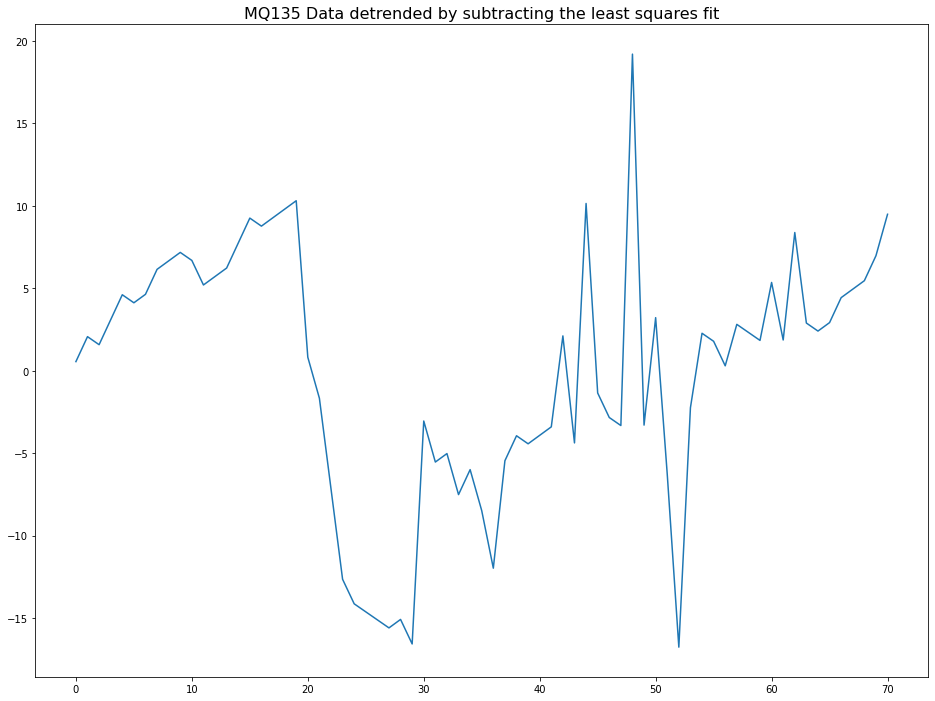

In [18]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(y1)
plt.plot(detrended)
plt.title('MQ135 Data detrended by subtracting the least squares fit', fontsize=16)
plt.show()

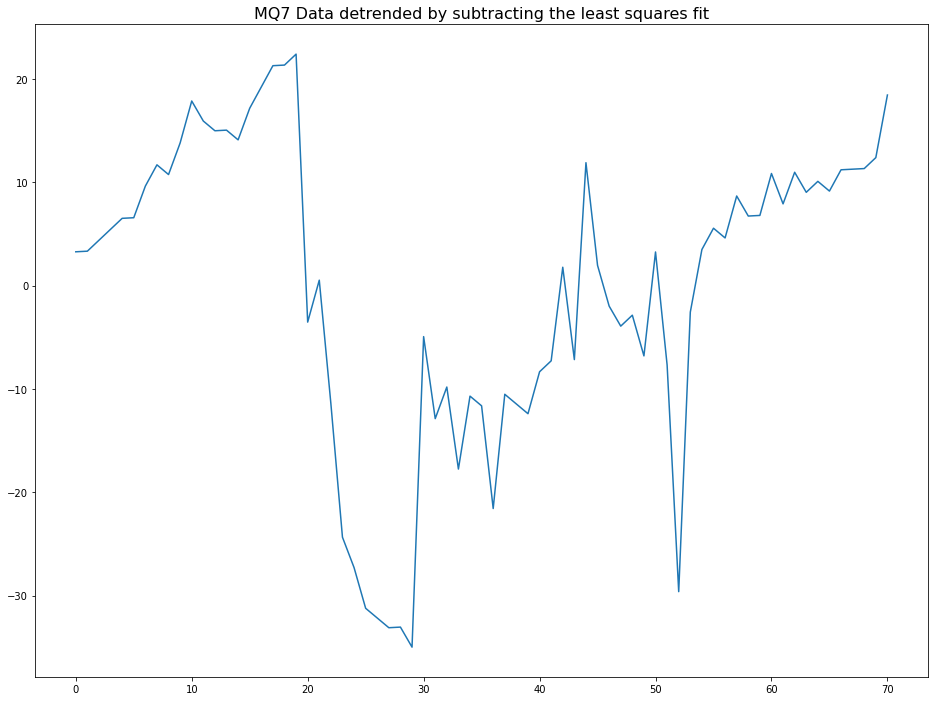

In [19]:
# Using scipy: Subtract the line of best fit
from scipy import signal
detrended = signal.detrend(y2)
plt.plot(detrended)
plt.title('MQ7 Data detrended by subtracting the least squares fit', fontsize=16)
plt.show()

In [25]:
# fit model
model = ARIMA(df["mq135"], order=(1,0,1)) # (ARMA) = (1,0,1)
model_fit = model.fit(disp=0)
model_fit.summary()

NotImplementedError: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been removed in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and statsmodels.tsa.SARIMAX.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained. It also offers alternative specialized
parameter estimators.


In [12]:
# predict
start_index = df["Date"][2000]
end_index = df["Date"][2060]
print(start_index)
forecast = model_fit.predict(start=start_index, end=end_index)

2015-12-25


KeyError: 'The `start` argument could not be matched to a location related to the index of the data.'

In [ ]:
# visualization
plt.figure(figsize=(22,10))
plt.plot(df["Date"],y1,label = "original")
plt.plot(forecast,label = "predicted")
plt.title("Time Series Forecast")
plt.xlabel("Date")
plt.ylabel("Mean Temperature")
plt.legend()
plt.show()